# ДЗ №9

## Этап 1. Подготовка данных

In [ ]:
pip install pandas matplotlib seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme(style="whitegrid")

PATH = "events.json"

try:
    df = pd.read_json(PATH)
except ValueError:
    df = pd.read_json(PATH, lines=True)

df.head()

,timestamp,event_id,signature,severity,source_ip,destination_ip,source_port,destination_port,protocol,user,action,request_url,http_method,http_status,bytes_sent,bytes_received,response_time,user_agent,hostname
0,2024-01-15 08:15:32.123000+00:00,EVT-2024-001,SQL Injection,high,192.168.1.45,10.0.0.10,54321,80,HTTP,anonymous,blocked,/api/users?id=1 OR 1=1--,GET,400.0,1024,256,45,Mozilla/5.0 (compatible; bot),web-server-01
1,2024-01-15 08:22:18.456000+00:00,EVT-2024-002,XSS Attack,medium,203.0.113.12,10.0.0.10,49152,443,HTTPS,user123,detected,/search?q=<script>alert('xss')</script>,GET,200.0,2048,512,32,Mozilla/5.0 (Windows NT 10.0; Win64; x64),web-server-01
2,2024-01-15 08:35:47.789000+00:00,EVT-2024-003,Brute Force,high,198.51.100.25,10.0.0.20,52341,22,SSH,admin,blocked,NaN,NaN,NaN,512,128,1200,NaN,ssh-server-01
3,2024-01-15 09:12:05.234000+00:00,EVT-2024-004,DDoS Attack,critical,172.16.0.100,10.0.0.10,0,80,TCP,NaN,mitigated,NaN,NaN,503.0,1048576,2048,5000,NaN,web-server-01
4,2024-01-15 09:28:33.567000+00:00,EVT-2024-005,Malware Detection,critical,10.0.0.50,203.0.113.45,49153,443,HTTPS,employee01,quarantined,/download/file.exe,GET,200.0,4096,524288,250,Mozilla/5.0 (Windows NT 10.0; Win64; x64),workstation-05


## Этап 2. Анализ данных

In [6]:
df.columns

Index(['timestamp', 'event_id', 'signature', 'severity', 'source_ip',
       'destination_ip', 'source_port', 'destination_port', 'protocol', 'user',
       'action', 'request_url', 'http_method', 'http_status', 'bytes_sent',
       'bytes_received', 'response_time', 'user_agent', 'hostname'],
      dtype='str')

In [10]:
if "signature" not in df.columns:
    raise KeyError("В файле нет поля 'signature'. Проверить структуру events.json")

# нормализуем подписи (на случай None или лишних пробелов)
df["signature"] = df["signature"].astype("string").str.strip()
df["signature"].isna().sum(), df.shape

df.head()

,timestamp,event_id,signature,severity,source_ip,destination_ip,source_port,destination_port,protocol,user,action,request_url,http_method,http_status,bytes_sent,bytes_received,response_time,user_agent,hostname
0,2024-01-15 08:15:32.123000+00:00,EVT-2024-001,SQL Injection,high,192.168.1.45,10.0.0.10,54321,80,HTTP,anonymous,blocked,/api/users?id=1 OR 1=1--,GET,400.0,1024,256,45,Mozilla/5.0 (compatible; bot),web-server-01
1,2024-01-15 08:22:18.456000+00:00,EVT-2024-002,XSS Attack,medium,203.0.113.12,10.0.0.10,49152,443,HTTPS,user123,detected,/search?q=<script>alert('xss')</script>,GET,200.0,2048,512,32,Mozilla/5.0 (Windows NT 10.0; Win64; x64),web-server-01
2,2024-01-15 08:35:47.789000+00:00,EVT-2024-003,Brute Force,high,198.51.100.25,10.0.0.20,52341,22,SSH,admin,blocked,NaN,NaN,NaN,512,128,1200,NaN,ssh-server-01
3,2024-01-15 09:12:05.234000+00:00,EVT-2024-004,DDoS Attack,critical,172.16.0.100,10.0.0.10,0,80,TCP,NaN,mitigated,NaN,NaN,503.0,1048576,2048,5000,NaN,web-server-01
4,2024-01-15 09:28:33.567000+00:00,EVT-2024-005,Malware Detection,critical,10.0.0.50,203.0.113.45,49153,443,HTTPS,employee01,quarantined,/download/file.exe,GET,200.0,4096,524288,250,Mozilla/5.0 (Windows NT 10.0; Win64; x64),workstation-05


In [18]:
signature_counts = (df["signature"].fillna("UNKNOWN").value_counts())
signature_counts

signature
Normal Traffic         11
HTTP Request            8
SQL Injection           6
XSS Attack              5
Successful Login        5
Brute Force             4
DDoS Attack             3
Malware Detection       3
Unauthorized Access     3
Data Exfiltration       3
Port Scan               3
File Access             3
Database Query          2
File Upload             1
Name: count, dtype: Int64

## Этап 3. Визуализация данных

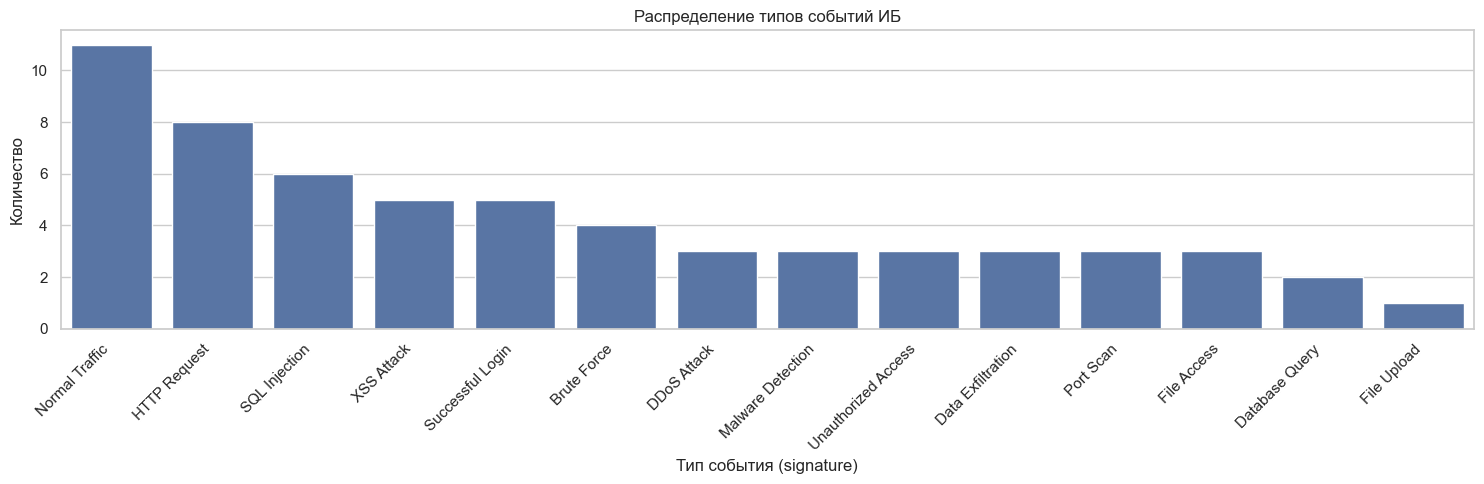

In [15]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(x=signature_counts.index, y=signature_counts.values)

ax.set_title("Распределение типов событий ИБ")
ax.set_xlabel("Тип события (signature)")
ax.set_ylabel("Количество")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

## Чек-лист самопроверки
- Установлены библиотеки Pandas, Matplotlib, Seaborn ✓
- Данные из файла JSON загружены в датафрейм с помощью Pandas ✓
- События информационной безопасности проанализированы по их типам (по полю «signature») ✓
- С помощью библиотеки Seaborn или Matplotlib построен график распределения типов событий информационной безопасности ✓
- После выполнения задания сверились с примером выполнения задания по теме «Python для аналитиков ИБ: API и анализ данных» ✓
- В личном кабинете прикреплена ссылка на репозиторий с кодом ✓
- Название ветки репозитория содержит фамилию и имя студента, номер домашнего задания ✓